In [1]:
# Import libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import sys
#sys.path.append("/Volumes/OneTouch/work/scripts")
sys.path.append("../tools")
import procBraided as pc
import skeletonize_func as skel
# Computing slopes
from sklearn.linear_model import LinearRegression
from shapely.geometry import LineString
from skimage.filters import gaussian

In [2]:

hemi='north'
# wdir = r"D:\work\SWOTbraided\scripts"
# odir = r"C:\Users\safr\OneDrive - DHI\Desktop\niger_braided_channel_test\out"
# maskdir = r"C:\Users\safr\OneDrive - DHI\Desktop\niger_braided_channel_test\watermasks"

wdir = r"C:\Users\safr\Documents\github\braided_rivers\scripts" #wdir is current directory
odir = r"../odir/niger/"
figdir = r"../figs/"
maskdir = r"c:\Users\safr\Documents\niger_braided_channel_test\watermasks"


isExist = os.path.exists(odir)
if not isExist:
    os.makedirs(odir)

# manually set low flow and high flow months
LFmonths = [1,2,3,4,11,12]
HFmonths = [5,6,7,8,9,10,'co'] # co = combined median image

runNewCL = True # Set to True if you want to regenerate centerlines


In [3]:
# Check that mask files are there

mask_files = glob.glob(maskdir+'/*.tif')
mask_files

test = mask_files[0]
os.path.basename(test)[24:28]

mask_files

['c:\\Users\\safr\\Documents\\niger_braided_channel_test\\watermasks\\S2_Niger_WaterMask_NDWI_0521.tif',
 'c:\\Users\\safr\\Documents\\niger_braided_channel_test\\watermasks\\S2_Niger_WaterMask_NDWI_0621.tif',
 'c:\\Users\\safr\\Documents\\niger_braided_channel_test\\watermasks\\S2_Niger_WaterMask_NDWI_co21.tif']

Runnning skeleton procedure for: 0521
Proceed with operation skeleton...
20210501
...........Running get skeleton algorithm...........
...........Running branch pruning algorithm...........
Running prune branches...
Pruning algorithm applied 1 times!
...........Running skeleton labeling algorithm...........
...........Running centerline extraction from skeleton algorithm...........
Processing branch No. 0...
Processing branch No. 1...
Processing branch No. 2...
Processing branch No. 3...
Processing branch No. 4...
Processing branch No. 5...
Processing branch No. 6...
Processing branch No. 7...
Processing branch No. 8...
Processing branch No. 9...
Processing branch No. 10...
Processing branch No. 11...
Processing branch No. 12...
Processing branch No. 13...
Processing branch No. 14...
Processing branch No. 15...
Processing branch No. 16...
Processing branch No. 17...
Processing branch No. 18...
Branch No. 18, has only than 1 pixel! Skipping and merging later...
Processing branch No. 19.

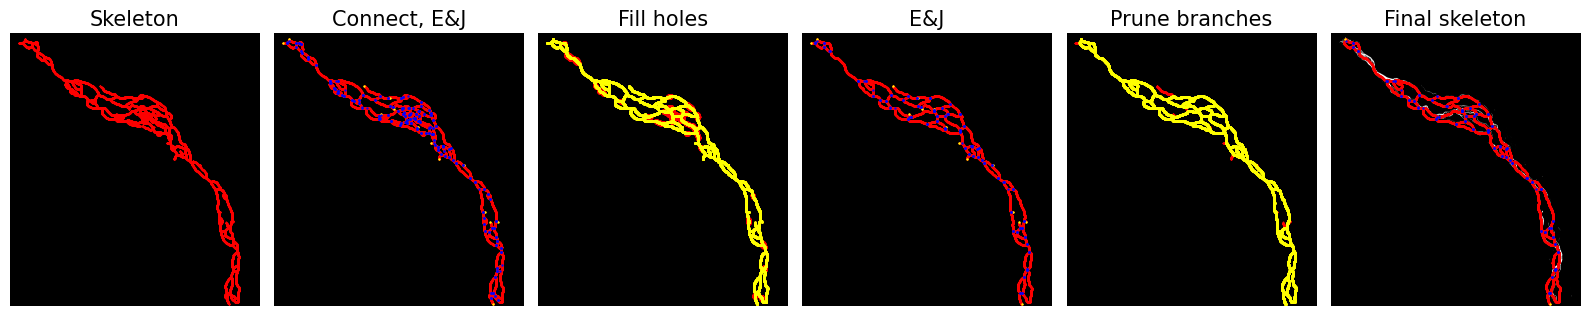

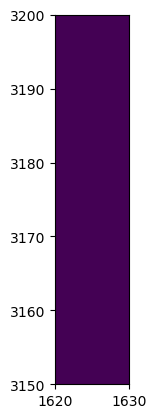

Number of endpoints:  2
Processing branch No. 64...
Branch No. 64, less than 2! Skeletonize...
Processing branch No. 65...
Processing branch No. 66...
Processing branch No. 67...
Processing branch No. 68...
Processing branch No. 69...
Processing branch No. 70...
Processing branch No. 71...
Processing branch No. 72...
Processing branch No. 73...
Processing branch No. 74...
Processing branch No. 75...
Processing branch No. 76...
Branch No. 76, has only than 1 pixel! Skipping and merging later...
Processing branch No. 77...
Processing branch No. 78...
Processing branch No. 79...
Processing branch No. 80...
Processing branch No. 81...
Processing branch No. 82...
Processing branch No. 83...
Processing branch No. 84...
Processing branch No. 85...
Processing branch No. 86...
Processing branch No. 87...
Processing branch No. 88...
Processing branch No. 89...
Processing branch No. 90...
Processing branch No. 91...
Processing branch No. 92...
Branch No. 92, less than 2! Skeletonize...
Processing

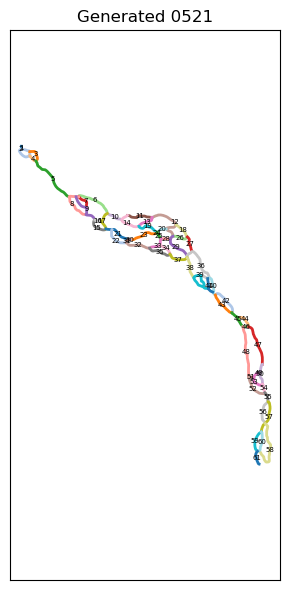

SUCCESSFUL SKELETON! Saving files...
Runnning skeleton procedure for: 0621
Proceed with operation skeleton...
20210601
...........Running get skeleton algorithm...........


KeyboardInterrupt: 

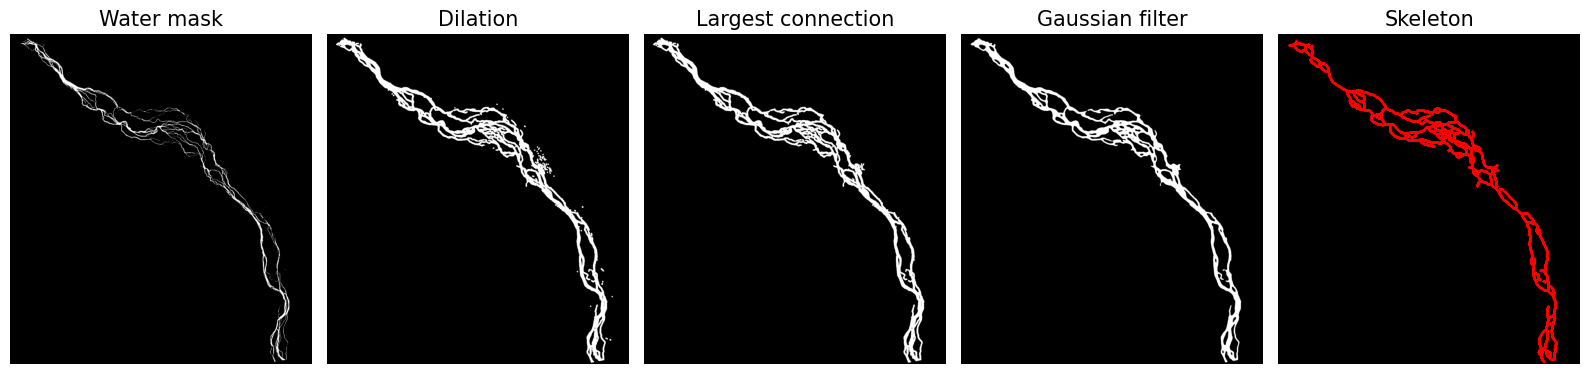

In [4]:
# ------------------------------ DYNAMICS ------------------------------


for filename in mask_files:

    maskdate = os.path.basename(filename)[24:28]
    print('Runnning skeleton procedure for:',str(maskdate))

    water_mask_tiff = filename


    #manual set - can also decide by season
    dilate = 10
    gauss = 10
    fill_hole_size = 100

    #Get season
    # if int(maskdate[0:2]) in LFmonths:
    #     dilate = 10
    #     gauss = 20
    # else:
    #     dilate = 10
    #     gauss = 30

    # Proceed with operation skeleton
    print('Proceed with operation skeleton...')
    # Create folder to save files...
    figdir = odir+'/'+maskdate+'/'
    isExist = os.path.exists(figdir)    
    if not isExist:
        os.makedirs(figdir)


    # format expected by the function is YYYYMMDD
    pixcdate = '2021'+maskdate[0:2]+'01'
    print(pixcdate)


    # FIRST Check if a centerline has already been created for this mask....
    if os.path.exists(odir+'/'+maskdate+'_fs_'+str(fill_hole_size)+'_generated_cl.geojson') and runNewCL == False:
        print('Mask centerline already processed!')
        cl_merged = gpd.read_file(odir+'/'+maskdate+'_fs_'+str(fill_hole_size)+'_generated_cl.geojson')
    else:
        water_mask = skel.get_watermask(water_mask_tiff)
        skeleton = skel.get_skeleton(water_mask,pixcdate,figdir,dilate,gauss,season='HF',second_dilation=False,savePlot=True)
        pruned_skeleton = skel.get_pruned_skeleton(skeleton, water_mask, pixcdate,figdir,distance_threshold=100,max_hole_size=fill_hole_size,prunethresh=600) # distance thresh for connecting pixels
        labeled_skeleton = skel.get_labeled_skeleton(pruned_skeleton,pixcdate,figdir,savePlot=True)
        gen_cl = skel.extract_cl_from_skeleton(labeled_skeleton,water_mask_tiff)
        cl_merged = skel.merge_short_centerlines(gen_cl,hemi)
        skel.plot_merged(cl_merged,maskdate,figdir)
        
        print('SUCCESSFUL SKELETON! Saving files...')
        cl_merged.to_file(odir+'/'+maskdate+'_fs_'+str(fill_hole_size)+'_generated_cl.geojson')



In [ ]:
labeled_skeleton

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4700, 4297))

In [5]:
##### testing - fixing for case where only one pixel is found in branch




def order_raster_from_endpoint(subskel,branch):
    # - Input is a skeleton with exactly one branch, with value =1 on the branch and zeros elsewhere
    # - Traces the branch from the first identified endpoint to the last
    # - returns ordered pixel coordinates in two arrays (x,y)
    # IF only one point in branch, return that point
    if len(np.where(subskel > 0)[0]) == 1:
        y,x = np.where(subskel > 0)
        return x,y


    endpoints = skel.find_endpoints(subskel)

    if len(np.where(endpoints==1)[0]) > 2:
        print('Caution! Branch No. '+str(branch)+', greater than 2 endpoints.')


    # Edge case when less than 2 endpoints are found
    if len(np.where(endpoints==1)[0]) < 2:
        print('Branch No. '+str(branch)+', less than 2! Skeletonize...')

        # plt.figure()
        # plt.imshow(subskel)
        # y, x = np.where(subskel > 0)
        # print('length of branch: ',len(y))
        # plt.scatter(x, y, color='yellow', s=0.5)
        # #y,x = np.where(endpoint_candidates == 1)
        # #plt.scatter(x, y, color='red', s=0.5)
        # y, x = np.where(endpoints == 1)
        # plt.scatter(x, y, color='blue', s=0.5) 
        # plt.show()

        subskel = skel.skeletonize(subskel)
        endpoints = skel.find_endpoints(subskel)



        if len(np.where(endpoints==1)[0]) < 2:
            print('Branch No. '+str(branch)+', still less than two endpoints after skeletonization...try alternate route.')
        
            joints, joints_removed = skel.find_joints(subskel)
            endpoint_candidates = skel.find_endpoints(joints_removed)
  
            endpoint_candidates = np.where(endpoint_candidates & endpoints, False, endpoint_candidates)


            # Select pixels with non-direct neighbors
            indirect_neighbors = skel.find_indirect_neighbors(joints_removed)
            endpoint_candidates = np.where(endpoint_candidates & indirect_neighbors, True, False)

            # Choose one! remove the other
            ep2y,ep2x = np.where(endpoint_candidates == 1)

            # Set second endpoint 
            endpoints[ep2y[0]][ep2x[0]] = 1

            # Remove other endpoint candidate from skeleton
            subskel[ep2y[1]][ep2x[1]] = 0

            plt.figure()
            plt.imshow(subskel)
            y,x = np.where(endpoint_candidates == 1)
            plt.scatter(x, y, color='red', s=0.5)
            y, x = np.where(endpoints == 1)
            plt.scatter(x, y, color='blue', s=0.5) 
            plt.xlim(1620,1630)
            plt.ylim(3150,3200)
            plt.show()

            print('Number of endpoints: ',len(np.where(endpoints == 1)[0]))


    firstpoint = (np.where(endpoints)[0][0], np.where(endpoints)[1][0]) # y, x
    lastpoint = [np.where(endpoints)[0][1], np.where(endpoints)[1][1]] # y, x

    
    # Now, from this point, trace neighbors and return ordered pixel_y and pixel_x list
    ordered_branch_pixels = skel.trace_branch_from_endpoint(firstpoint,[lastpoint],subskel)
    
    # Append last point
    ordered_branch_pixels.append((np.where(endpoints)[0][1], np.where(endpoints)[1][1]))
    
    pixel_coords_x = [x for y,x in ordered_branch_pixels]
    pixel_coords_y = [y for y,x in ordered_branch_pixels]

    return pixel_coords_x,pixel_coords_y

Processing branch No. 0...
Processing branch No. 1...
Processing branch No. 2...
Processing branch No. 3...
Processing branch No. 4...
Processing branch No. 5...
Processing branch No. 6...
Processing branch No. 7...
Processing branch No. 8...
Processing branch No. 9...
Processing branch No. 10...
Processing branch No. 11...
Processing branch No. 12...
Processing branch No. 13...
Processing branch No. 14...
Processing branch No. 15...
Processing branch No. 16...
Processing branch No. 17...
Processing branch No. 18...
Branch No. 18, has only than 1 pixel! Skipping and merging later...
Processing branch No. 19...
Processing branch No. 20...
Processing branch No. 21...
Processing branch No. 22...
Processing branch No. 23...
Processing branch No. 24...
Branch No. 24, less than 2! Skeletonize...
Processing branch No. 25...
Processing branch No. 26...
Processing branch No. 27...
Processing branch No. 28...
Processing branch No. 29...
Processing branch No. 30...
Processing branch No. 31...
Pro

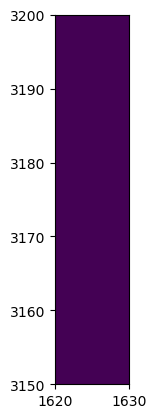

Number of endpoints:  2
Processing branch No. 64...
Branch No. 64, less than 2! Skeletonize...
Processing branch No. 65...
Processing branch No. 66...
Processing branch No. 67...
Processing branch No. 68...
Processing branch No. 69...
Processing branch No. 70...
Processing branch No. 71...
Processing branch No. 72...
Processing branch No. 73...
Processing branch No. 74...
Processing branch No. 75...
Processing branch No. 76...
Branch No. 76, has only than 1 pixel! Skipping and merging later...
Processing branch No. 77...
Processing branch No. 78...
Processing branch No. 79...
Processing branch No. 80...
Processing branch No. 81...
Processing branch No. 82...
Processing branch No. 83...
Processing branch No. 84...
Processing branch No. 85...
Processing branch No. 86...
Processing branch No. 87...
Processing branch No. 88...
Processing branch No. 89...
Processing branch No. 90...
Processing branch No. 91...
Processing branch No. 92...
Branch No. 92, less than 2! Skeletonize...
Processing

<Axes: >

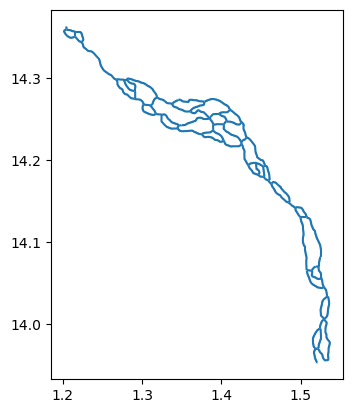

In [7]:

def find_nearest_branch(subskel,labeled_skeleton):
    # subsket is a skeleton with less only 1 pixel
    # labeled_skeleton is the original skeleton with branch IDs
    # returns the nearest branch ID to the subskel
    print('Finding nearest branch to branch with less than 1 pixel...')
    y,x = np.where(subskel > 0)
    y = y[0]
    x = x[0]

    # nearest positive value in labeled_skeleton that is not at the same location as itself, extract branch ID
    # compute distance from y,x to all other postive values in labeled_skeleton
    y2,x2 = np.where(labeled_skeleton > 0)
    distances = np.sqrt((y2-y)**2 + (x2-x)**2)
    distances = np.where(distances == 0, np.inf, distances)
    nearest_branch = np.argmin(distances)

    print('nearest branch: ',labeled_skeleton[y2[nearest_branch]][x2[nearest_branch]])
    return labeled_skeleton[y2[nearest_branch]][x2[nearest_branch]]



line_data = []
skipped_branches = []
for branch in np.unique(labeled_skeleton):
    print('Processing branch No. '+str(branch)+'...')
    if branch == 0:
        continue

    # extract subskeleton
    subskel = np.zeros_like(labeled_skeleton)
    subskel[labeled_skeleton == branch] =  1
    # if subskeleton has less than 1 pixels, store the branch ID and append that pixel to nearest branch outside of the branch loop
    if len(np.where(subskel > 0)[0]) == 1:
        print('Branch No. '+str(branch)+', has only than 1 pixel! Skipping and merging later...')
        skipped_branches.append(branch)
        continue

    # order raster from endpoint
    pixel_coords_x,pixel_coords_y = order_raster_from_endpoint(subskel,branch)

    # Convert ordered pixel coordinates to lat lon
    line = skel.pixel_coordinates2latlonline(water_mask_tiff,pixel_coords_y,pixel_coords_x,branch,reverse=True)

    # append gdf line to overall gdf with branch id
    line_data.append({'branch_id': branch, 'geometry': line})

# go through skipped branches, and append to nearest branch
for branch in skipped_branches:
    print('Merging pixels in branch No. '+str(branch)+' to nearest branch...')
    # extract subskeleton
    subskel = np.zeros_like(labeled_skeleton)
    subskel[labeled_skeleton == branch] =  1

    # locate nearest pixel from another branch
    nearest_branch = find_nearest_branch(subskel,labeled_skeleton)

    # merge pixels
    labeled_skeleton[labeled_skeleton == branch] = nearest_branch

    # rerun order raster from endpoint and convert to lat lon for the nearest branch with new appended pixel
    subskel = np.zeros_like(labeled_skeleton)
    subskel[labeled_skeleton == nearest_branch] =  1
    pixel_coords_x,pixel_coords_y = order_raster_from_endpoint(subskel,nearest_branch)

    # Convert ordered pixel coordinates to lat lon
    line = skel.pixel_coordinates2latlonline(water_mask_tiff,pixel_coords_y,pixel_coords_x,nearest_branch,reverse=True)

    # REMOVE old line with branch_id = nearest_branch from line_data
    line_data = [line for line in line_data if line['branch_id'] != nearest_branch]

    # append gdf line to overall gdf with branch id
    line_data.append({'branch_id': nearest_branch, 'geometry': line})

cl_gdf_labeled = gpd.GeoDataFrame(line_data, crs="EPSG:4326")  # Assuming WGS84
cl_gdf_labeled.plot()
